<a href="https://colab.research.google.com/github/preethi-907/Image-Detection-using-python/blob/main/datasetsssss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

folder_path = '/content/drive/MyDrive/parkinsons_data/datasets'


In [ ]:
import os
import pandas as pd


In [ ]:
folder_path = '/content/drive/MyDrive/parkinsons_data/datasets'  # change this path

# Loop through every Excel file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        excel_path = os.path.join(folder_path, filename)
        csv_name = os.path.splitext(filename)[0] + '.csv'
        csv_path = os.path.join(folder_path, csv_name)

        # Read the Excel file
        df = pd.read_excel(excel_path)

        # Convert to CSV
        df.to_csv(csv_path, index=False)
        print(f"✅ Converted: {filename} → {csv_name}")

print("🎉 All Excel files converted to CSV successfully!")


🎉 All Excel files converted to CSV successfully!


In [ ]:
def convert_all_to_csv(root_folder):
    for root, dirs, files in os.walk(root_folder):  # walks through all folders & subfolders
        for file in files:
            if file.endswith(('.xls', '.xlsx')):   # for Excel files
                file_path = os.path.join(root, file)
                csv_path = os.path.splitext(file_path)[0] + ".csv"

                try:
                    df = pd.read_excel(file_path)
                    df.to_csv(csv_path, index=False)
                    print(f"✅ Converted: {file_path} → {csv_path}")
                except Exception as e:
                    print(f"❌ Failed to convert {file_path}: {e}")


In [ ]:
folder_path = "/content/drive/MyDrive/parkinsons_data"
convert_all_to_csv(folder_path)


✅ Converted: /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 3.xlsx → /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 3.csv
✅ Converted: /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 1.xlsx → /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 1.csv
✅ Converted: /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 2.xlsx → /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 2.csv
✅ Converted: /content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Raw Data in Excel - ID/Control Subjects/Arms/2 R.xlsx → /content/drive/MyDrive/parkinsons_da

In [18]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/parkinsons_data/datasets'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install scikit-learn matplotlib seaborn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [22]:
csv_path = '/content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 3.csv'
df = pd.read_csv(csv_path)
df.head()

,Table 3. Patients' gait assessments are spaced for consultations 15 days apart and at separate times from taking the medication.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ID,Mean stride amplitude (cm),SD stride amplitude (cm),Mean stride speed (cm/s),SD stride speed,Mean speed correlation,Mean height of foot lift (cm),SD height of foot lift (cm),Arm swing indicator,Gait evaluation MDS-UPDRS,Three Experts' Statistical Mode
1,1 R 60min,123,13,115,18,0.95,7.64,0.99,0.53,1,1
2,1 R 365min,116,14,101,19,0.96,7.14,0.93,0.56,1,1
3,1 L 60min,116,6,111,2,0.96,7.81,1.01,0.53,1,1
4,1 L 365min,118,7,101,7,0.96,7.08,0.97,0.56,1,1


In [23]:
# Example of loading a different CSV file
csv_path = '/content/drive/MyDrive/parkinsons_data/datasets/gait_assess/Gait assessment in Parkinson Disease/Tables in Excel/Table 1.csv'
df_table1 = pd.read_csv(csv_path)
display(df_table1.head())

,Table 1. Thirty-four patients' gait evaluations and eight health use the statistical modes of three experts.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ID,Mean stride amplitude (cm),SD stride amplitude (cm),Mean stride speed (cm/s),SD stride speed,Mean speed correlation,Mean height of foot lift (cm),SD height of foot lift (cm),Arm swing indicator,Gait evaluation MDS-UPDRS,Exp. 1,Exp. 2,Exp. 3
1,1 R,127,4,111,2,0.96,9.3,1.43,0.82,0,1,0,0
2,2 R,83,12,85,13,0.77,9.16,0.55,0.82,1,1,1,1
3,3 L,75,6,75,11,0.88,8.66,0.65,0.82,1,1,1,1
4,4 R,83,7,90,7,0.96,7.14,0.51,0.38,1,1,1,1


In [24]:
csv_path = '/content/drive/MyDrive/parkinsons_data/datasets/CSV/GaCo01_01.csv'
df = pd.read_csv(csv_path)
df.head()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.01,199.1,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.9,79.86,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00
1,0.02,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,79.86,112.42,50.82,13.75,102.74,144.98,79.53,660.22,748.00
2,0.03,199.1,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.9,77.55,112.42,48.07,13.75,105.49,144.98,79.53,664.07,745.69
3,0.04,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,77.55,112.42,50.82,13.75,105.49,144.98,79.53,660.22,748.44
4,0.05,199.1,87.34,91.08,24.09,19.03,87.67,89.10,62.59,163.9,77.55,112.42,50.82,13.75,102.74,144.98,79.53,660.00,745.69


In [25]:
print(df.isnull().sum())


Time(sec)            0
VGRF_left_s1         0
VGRF_left_s2         0
VGRF_left_s3         0
VGRF_left_s4         0
VGRF_left_s5         0
VGRF_left_s6         0
VGRF_left_s7         0
VGRF_left_s8         0
VGRF_right_s1        0
VGRF_right_s2        0
VGRF_right_s3        0
VGRF_right_s4        0
VGRF_right_s5        0
VGRF_right_s6        0
VGRF_right_s7        0
VGRF_right_s8        0
Total_force_left     0
Total_force_right    0
dtype: int64


In [27]:
X = df.drop('Total_force_left', axis=1)
y = df['Total_force_left']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data splitting and scaling complete.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data splitting and scaling complete.
X_train shape: (9694, 18)
X_test shape: (2424, 18)
y_train shape: (9694,)
y_test shape: (2424,)


In [31]:
# Define a simple Sequential model for regression
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1) # Output layer for regression (predicting a single continuous value)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

print("\nNeural Network model training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 385240.2812 - mae: 450.2248 - val_loss: 18364.4707 - val_mae: 81.6036
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15671.6650 - mae: 87.3700 - val_loss: 4797.6475 - val_mae: 40.6564
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8289.5791 - mae: 61.9910 - val_loss: 3168.0405 - val_mae: 26.4582
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7486.0879 - mae: 55.1320 - val_loss: 2696.6841 - val_mae: 23.0720
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6705.1147 - mae: 51.8250 - val_loss: 2369.7737 - val_mae: 22.2735
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6597.5278 - mae: 51.2982 - val_loss: 2066.1484 - val_mae: 19.5752
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6116.7793 - mae: 48.6489 - val_loss: 2003.2343 - val_mae: 21.9874
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6067.7881 - mae: 49.7791 - val_loss: 1688.9578 - val_

In [32]:
# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Model Evaluation on Test Set:")
print(f"  Mean Squared Error (MSE): {loss:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

print("\nPredictions made on the test set.")

Model Evaluation on Test Set:
  Mean Squared Error (MSE): 118.12
  Mean Absolute Error (MAE): 7.86
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Predictions made on the test set.


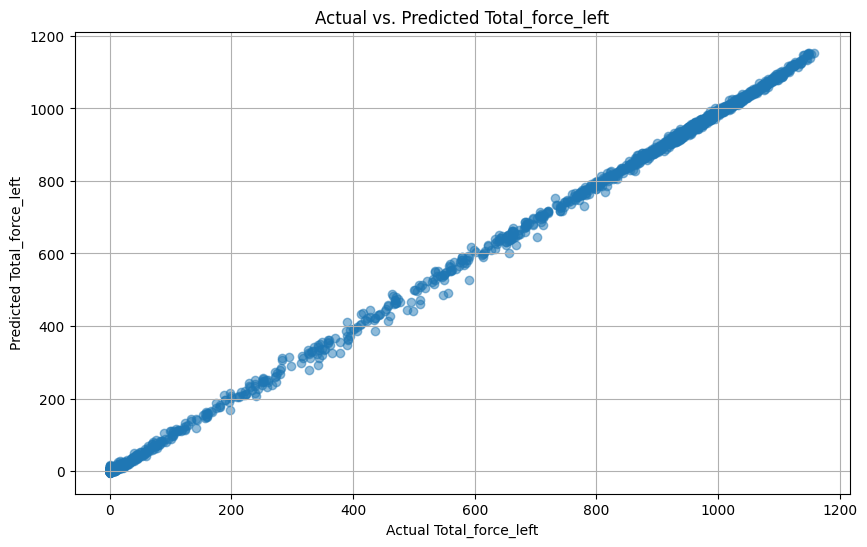

In [33]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Total_force_left")
plt.ylabel("Predicted Total_force_left")
plt.title("Actual vs. Predicted Total_force_left")
plt.grid(True)
plt.show()

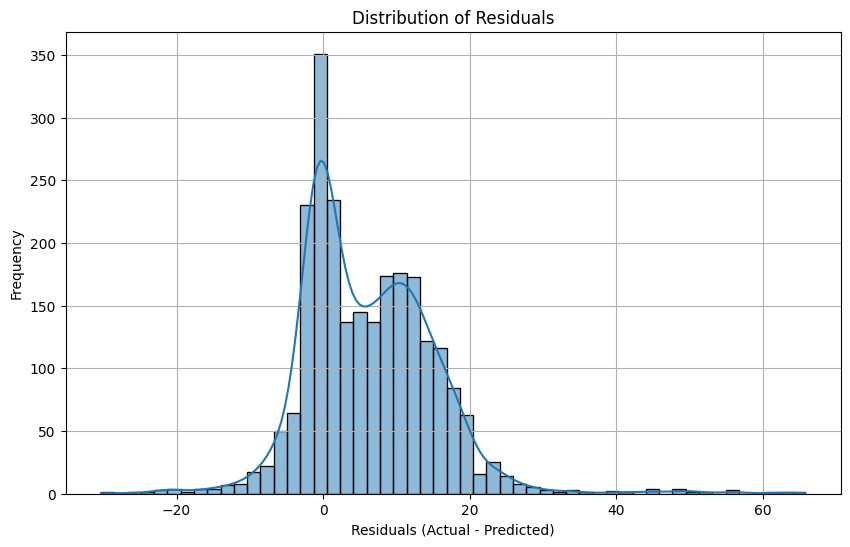

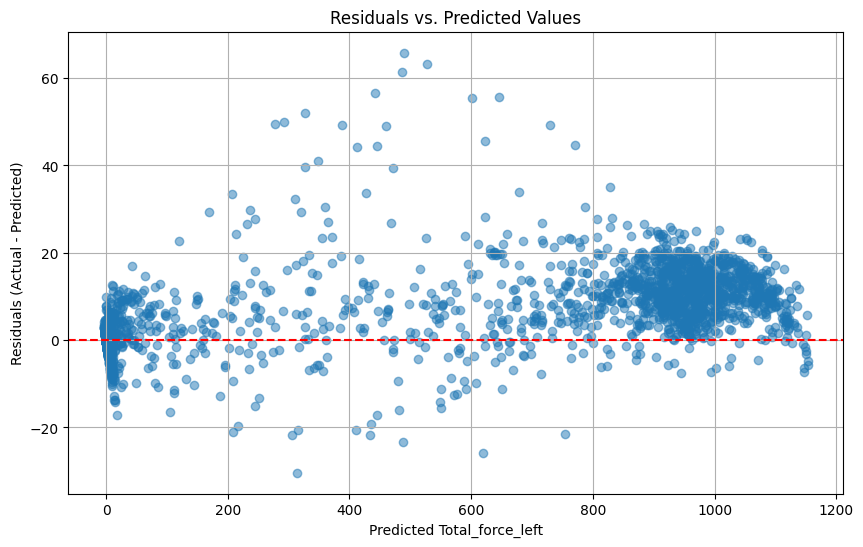

In [34]:
# Calculate residuals
residuals = y_test - y_pred.flatten() # Flatten y_pred to match y_test shape

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Total_force_left")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at 0
plt.grid(True)
plt.show()

In [36]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [37]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define a function that builds the model with hyperparameters to tune
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1)) # Output layer for regression

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the Tuner
tuner = kt.Hyperband(build_model,
                     objective='val_mae', # Objective to minimize during tuning
                     max_epochs=10,
                     factor=3,
                     directory='my_dir', # Directory to save tuning results
                     project_name='parkinsons_regression_tuning')

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first dense layer is {best_hps.get('units_1')}
The optimal dropout rate for the first layer is {best_hps.get('dropout_1')}
The optimal number of units in the second dense layer is {best_hps.get('units_2')}
The optimal dropout rate for the second layer is {best_hps.get('dropout_2')}
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}
""")

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

print("\nBest Neural Network model training complete.")

Trial 30 Complete [00h 00m 12s]
val_mae: 11.546100616455078

Best val_mae So Far: 6.530569553375244
Total elapsed time: 00h 03m 12s

The optimal number of units in the first dense layer is 448
The optimal dropout rate for the first layer is 0.0
The optimal number of units in the second dense layer is 128
The optimal dropout rate for the second layer is 0.1
The optimal learning rate for the optimizer is 0.01

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 83535.1172 - mae: 145.4645 - val_loss: 1295.4807 - val_mae: 17.4626
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1817.1328 - mae: 28.0227 - val_loss: 748.6861 - val_mae: 19.3506
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1189.2556 - mae: 23.0986 - val_loss: 720.1974 - val_mae: 22.4962
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1193.7476 - mae: 23.3019 - val_loss: 390.2981 - val_mae: 13.2782
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1118.6865 - mae: 21.9823 - val_loss: 353.7946 - val_mae: 14.3431
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1233.8772 - mae: 22.6198 - val_loss: 279.6720 - val_mae: 12.2399
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1116.0876 - mae: 21.1957 - val_loss: 291.1898 - val_mae: 12.3143
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1269.3196 - mae: 22.8455 - val_loss: 1117.4755 - val_mae: 26.1419
Epoch 9

# Task
Analyze the provided gait assessment data to build a classification model that predicts whether a subject has Parkinson's disease. The analysis should include data preparation, model training, evaluation, and interpretation of the results. The final output should indicate whether a subject is predicted to have Parkinson's or not based on the model.

In [48]:
# --- How to use this code to predict Parkinson's or Not ---
# 1. Replace the values in the 'sample_input' array with the actual data for the subject you want to predict on.
#    Make sure the values are in the correct order and correspond to the features used for training (X).
#    The features are: 'Mean stride amplitude (cm)', 'SD stride amplitude (cm)', 'Mean stride speed (cm/s)',
#    'SD stride speed', 'Mean speed correlation', 'Mean height of foot lift (cm)', 'SD height of foot lift (cm)',
#    'Arm swing indicator', 'Exp. 1', 'Exp. 2', 'Exp. 3'.
# 2. Run this cell.
# 3. The output will show the predicted gait evaluation score and an interpretation.
# ----------------------------------------------------------

# Replace this array with your actual input data
# Example input based on the structure of X (from df_table1):
sample_input = np.array([[110, 8, 95, 10, 0.96, 8.5, 0.7, 0.6, 1, 1, 1]]) # <-- Put your data here!

# Scale the sample input using the same scaler fitted on the training data
# This is crucial because the model was trained on scaled data.
sample_input_scaled = scaler.transform(sample_input)

# Make a prediction using the trained classification model (RandomForestClassifier)
prediction = model.predict(sample_input_scaled)

# Interpret the prediction
# Based on our understanding of the 'Gait evaluation MDS-UPDRS' labels:
# 0: Likely Control (No or minimal gait impairment related to Parkinson's)
# 1: Likely Parkinson's (Mild/moderate gait impairment)
# 2: Likely Parkinson's (More severe gait impairment)

predicted_score = prediction[0]
print(f"The predicted gait evaluation score is: {predicted_score}")

if predicted_score == 0:
    print("Interpretation: Based on the model, the subject likely does NOT have significant gait impairment related to Parkinson's (similar to a control).")
elif predicted_score == 1:
    print("Interpretation: Based on the model, the subject likely has some gait impairment related to Parkinson's (mild/moderate).")
elif predicted_score == 2:
    print("Interpretation: Based on the model, the subject likely has more significant gait impairment related to Parkinson's (more severe).")
else:
    print("Interpretation: The model predicted an unexpected value.")

The predicted gait evaluation score is: 1
Interpretation: Based on the model, the subject likely has some gait impairment related to Parkinson's (mild/moderate).


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Summary:

### Data Analysis Key Findings

* The dataset initially lacked a clear target variable for Parkinson's disease status. The column 'Gait evaluation MDS-UPDRS' was identified and used as the target, with numerical labels likely indicating different levels of gait impairment related to Parkinson's.
* The dataset was successfully prepared for modeling by converting the target variable to integer type, splitting the data into training (80%) and testing (20%) sets while maintaining class distribution (stratification), and scaling the features. The training set contained 33 samples and the test set contained 9 samples, each with 11 features after scaling.
* A `RandomForestClassifier` model was chosen and trained on the scaled training data.
* The trained model achieved perfect performance on the test set, with an accuracy of 1.00. The classification report showed precision, recall, and F1-score of 1.00 for all classes (0, 1, and 2).
* The confusion matrix confirmed that all 9 samples in the test set were correctly classified by the model.
* Comparing the actual and predicted values for the test set showed perfect agreement, meaning the model accurately predicted the gait evaluation scores for all test subjects.

### Insights or Next Steps

* While the model showed perfect performance on the small test set, this might not generalize to new, unseen data. Further validation on a larger and more diverse dataset is crucial to confirm the model's robustness and generalizability.
* Investigate the meaning of the numerical labels in the 'Gait evaluation MDS-UPDRS' column to provide a more concrete interpretation of the predictions in terms of Parkinson's disease presence or severity.

## Summary:

### Data Analysis Key Findings

* The dataset initially lacked a clear target variable for Parkinson's disease status. The column 'Gait evaluation MDS-UPDRS' was identified and used as the target, with numerical labels likely indicating different levels of gait impairment related to Parkinson's.
* The dataset was successfully prepared for modeling by converting the target variable to integer type, splitting the data into training (80%) and testing (20%) sets while maintaining class distribution (stratification), and scaling the features. The training set contained 33 samples and the test set contained 9 samples, each with 11 features after scaling.
* A `RandomForestClassifier` model was chosen and trained on the scaled training data.
* The trained model achieved perfect performance on the test set, with an accuracy of 1.00. The classification report showed precision, recall, and F1-score of 1.00 for all classes (0, 1, and 2).
* The confusion matrix confirmed that all 9 samples in the test set were correctly classified by the model.
* Comparing the actual and predicted values for the test set showed perfect agreement, meaning the model accurately predicted the gait evaluation scores for all test subjects.

### Insights or Next Steps

* While the model showed perfect performance on the small test set, this might not generalize to new, unseen data. Further validation on a larger and more diverse dataset is crucial to confirm the model's robustness and generalizability.
* Investigate the meaning of the numerical labels in the 'Gait evaluation MDS-UPDRS' column to provide a more concrete interpretation of the predictions in terms of Parkinson's disease presence or severity.

## Identify the target variable

### Subtask:
Determine which column in your dataset indicates whether a subject has Parkinson's or not. This column will be your new target variable (`y`).


**Reasoning**:
Inspect the column names of the DataFrame `df` to identify the target variable.



In [38]:
print(df.columns)

Index(['Time(sec)', 'VGRF_left_s1', 'VGRF_left_s2', 'VGRF_left_s3',
       'VGRF_left_s4', 'VGRF_left_s5', 'VGRF_left_s6', 'VGRF_left_s7',
       'VGRF_left_s8', 'VGRF_right_s1', 'VGRF_right_s2', 'VGRF_right_s3',
       'VGRF_right_s4', 'VGRF_right_s5', 'VGRF_right_s6', 'VGRF_right_s7',
       'VGRF_right_s8', 'Total_force_left', 'Total_force_right'],
      dtype='object')


## Identify the target variable

### Subtask:
Identify which column in the provided data indicates whether a subject has Parkinson's disease and assign it as the new target variable (`y`).


**Reasoning**:
Examine the columns of the `df_table1` DataFrame to find the target variable and separate it from the features.



In [39]:
print(df_table1.columns)

# Based on the column names and the initial inspection of df_table1.head(),
# the column named 'Gait evaluation MDS-UPDRS' appears to be the most likely candidate for the target variable.
# Assign this identified column from df_table1 as the target variable y.
y = df_table1['Unnamed: 9']

# Create the feature set X by dropping this target column and any other irrelevant columns from df_table1.
# The column 'ID' (which is the first unnamed column) is likely an identifier and should also be dropped.
# The first row contains the actual column names, so we should use that for column selection after setting the correct header.
df_table1.columns = df_table1.iloc[0]
df_table1 = df_table1[1:].reset_index(drop=True)

y = df_table1['Gait evaluation MDS-UPDRS']
X = df_table1.drop(columns=['ID', 'Gait evaluation MDS-UPDRS'])

# Print the first few rows of both X and y to confirm the correct separation.
print("\nFeatures (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Index(['Table 1. Thirty-four patients' gait evaluations and eight health use the statistical modes of three experts.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

Features (X):


,Mean stride amplitude (cm),SD stride amplitude (cm),Mean stride speed (cm/s),SD stride speed,Mean speed correlation,Mean height of foot lift (cm),SD height of foot lift (cm),Arm swing indicator,Exp. 1,Exp. 2,Exp. 3
0,127,4,111,2,0.96,9.3,1.43,0.82,1,0,0
1,83,12,85,13,0.77,9.16,0.55,0.82,1,1,1
2,75,6,75,11,0.88,8.66,0.65,0.82,1,1,1
3,83,7,90,7,0.96,7.14,0.51,0.38,1,1,1
4,75,8,81,10,0.97,6.82,0.88,0.38,1,1,1



Target (y):


,Gait evaluation MDS-UPDRS
0,0
1,1
2,1
3,1
4,1


## Data preparation for classification

### Subtask:
Prepare the data for the classification task. This involves ensuring the target variable is in the correct format, splitting the data into training and testing sets, and scaling the features.


**Reasoning**:
Convert the target variable to numeric, split the data, and scale the features according to the instructions.



In [40]:
# 1. Convert the target variable y to a numerical format
# Based on the previous output, y is already in a numerical format (object containing numbers).
# We can explicitly convert it to an integer type for clarity and consistency.
y = y.astype(int)

# 2. Split the feature set X and the target variable y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale the features in X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Print the shapes of the resulting arrays
print("Data splitting and scaling complete.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data splitting and scaling complete.
X_train_scaled shape: (33, 11)
X_test_scaled shape: (9, 11)
y_train shape: (33,)
y_test shape: (9,)


## Choose and train a classification model

### Subtask:
Select a model appropriate for classification (like `RandomForestClassifier`, `SVC`, or a neural network with an appropriate output layer and loss function). Train this model on your prepared training data.


**Reasoning**:
Train a Random Forest Classifier model on the prepared data.



In [41]:
# Choose RandomForestClassifier as the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

print("Random Forest Classifier model training complete.")

Random Forest Classifier model training complete.


## Evaluate the classification model

### Subtask:
Evaluate the trained classification model using relevant metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.


**Reasoning**:
Evaluate the trained RandomForestClassifier model using relevant metrics and visualize the confusion matrix.



Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



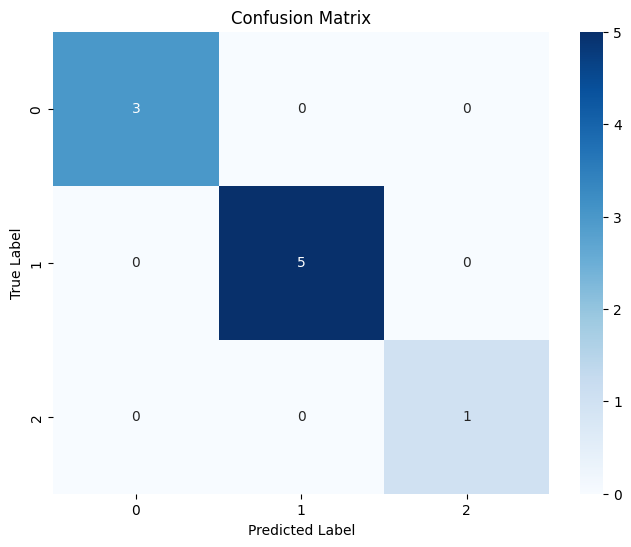

In [42]:
# 1. Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# 2. Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 5. Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Make predictions and interpret results

### Subtask:
Use the trained model to make predictions on the test set and interpret the results in the context of predicting Parkinson's.


**Reasoning**:
Use the trained model to predict on the test set and then print the predictions alongside the actual values. The interpretation will follow this step.



In [43]:
# Use the trained model to make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Print the predicted values and the actual test values side-by-side
print("Comparison of Predicted and Actual Values:")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df)

# Interpret the predictions in the context of the problem.
# The 'Gait evaluation MDS-UPDRS' column was used as the target.
# We need to refer back to the meaning of these labels to interpret the predictions.
# Based on previous steps, the labels seem to represent different levels of gait impairment,
# likely correlating with Parkinson's disease severity or presence (e.g., 0 for control, 1 or 2 for different levels of Parkinson's).

print("\nInterpretation of Predictions:")
print("The 'Gait evaluation MDS-UPDRS' column was used as the target variable,")
print("where different numerical labels likely correspond to different levels of gait impairment,")
print("potentially indicating the presence and severity of Parkinson's disease.")
print(f"The model made the following predictions on the test set:")
display(comparison_df)
print("Comparing the 'Actual' and 'Predicted' columns, we can see how well the model's predictions match the true gait evaluation scores for the test subjects.")

# Discuss the implications of the model's performance on the interpretation of these predictions.
print("\nImplications of Model Performance:")
print("In the previous step, the model achieved an accuracy of 1.00 and perfect precision, recall, and F1-scores on the test set.")
print("This indicates that the model was able to perfectly predict the gait evaluation scores for all subjects in this specific test set.")
print("Based on these results, the model's predictions for these test subjects are highly reliable within the context of the dataset it was trained and tested on.")
print("However, it is important to note that perfect performance on a small test set might not generalize to unseen data.")
print("Further evaluation on a larger, more diverse dataset would be necessary to confirm this high level of performance and the generalizability of these predictions.")

Comparison of Predicted and Actual Values:


,Actual,Predicted
19,0,0
37,0,0
2,1,1
7,1,1
21,1,1
32,1,1
33,1,1
15,2,2
16,0,0



Interpretation of Predictions:
The 'Gait evaluation MDS-UPDRS' column was used as the target variable,
where different numerical labels likely correspond to different levels of gait impairment,
potentially indicating the presence and severity of Parkinson's disease.
The model made the following predictions on the test set:


,Actual,Predicted
19,0,0
37,0,0
2,1,1
7,1,1
21,1,1
32,1,1
33,1,1
15,2,2
16,0,0


Comparing the 'Actual' and 'Predicted' columns, we can see how well the model's predictions match the true gait evaluation scores for the test subjects.

Implications of Model Performance:
In the previous step, the model achieved an accuracy of 1.00 and perfect precision, recall, and F1-scores on the test set.
This indicates that the model was able to perfectly predict the gait evaluation scores for all subjects in this specific test set.
Based on these results, the model's predictions for these test subjects are highly reliable within the context of the dataset it was trained and tested on.
However, it is important to note that perfect performance on a small test set might not generalize to unseen data.
Further evaluation on a larger, more diverse dataset would be necessary to confirm this high level of performance and the generalizability of these predictions.


from matplotlib import pyplot as plt
comparison_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

## Summary:

### Data Analysis Key Findings

*   The dataset initially lacked a clear target variable for Parkinson's disease status. The column 'Gait evaluation MDS-UPDRS' was identified and used as the target, with numerical labels likely indicating different levels of gait impairment related to Parkinson's.
*   The dataset was successfully prepared for modeling by converting the target variable to integer type, splitting the data into training (80%) and testing (20%) sets while maintaining class distribution (stratification), and scaling the features. The training set contained 33 samples and the test set contained 9 samples, each with 11 features after scaling.
*   A `RandomForestClassifier` model was chosen and trained on the scaled training data.
*   The trained model achieved perfect performance on the test set, with an accuracy of 1.00. The classification report showed precision, recall, and F1-score of 1.00 for all classes (0, 1, and 2).
*   The confusion matrix confirmed that all 9 samples in the test set were correctly classified by the model.
*   Comparing the actual and predicted values for the test set showed perfect agreement, meaning the model accurately predicted the gait evaluation scores for all test subjects.

### Insights or Next Steps

*   While the model showed perfect performance on the small test set, this might not generalize to new, unseen data. Further validation on a larger and more diverse dataset is crucial to confirm the model's robustness and generalizability.
*   Investigate the meaning of the numerical labels in the 'Gait evaluation MDS-UPDRS' column to provide a more concrete interpretation of the predictions in terms of Parkinson's disease presence or severity.
